In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
data = {
"Time": pd.date_range(start="2025-01-01", periods=100, freq="H"),
"Temperature": np.random.normal(75, 5, 100),
"Pressure": np.random.normal(30, 3, 100),
"Production_Output": np.random.normal(500, 50, 100)
}
df = pd.DataFrame(data)

C:\Users\ok\AppData\Local\Temp\ipykernel_6112\4150138688.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "Time": pd.date_range(start="2025-01-01", periods=100, freq="H"),


In [3]:
print(" Sample Industrial Data:")
print(df.head())

 Sample Industrial Data:
                 Time  Temperature   Pressure  Production_Output
0 2025-01-01 00:00:00    77.483571  25.753888         517.889368
1 2025-01-01 01:00:00    74.308678  28.738064         528.039226
2 2025-01-01 02:00:00    78.238443  28.971856         554.152562
3 2025-01-01 03:00:00    82.615149  27.593168         552.690103
4 2025-01-01 04:00:00    73.829233  29.516143         431.116532


In [4]:
df.loc[5:8,"Temperature"] = np.nan
df["Temperature"].fillna(df["Temperature"].mean(), inplace=True) 

C:\Users\ok\AppData\Local\Temp\ipykernel_6112\1168675726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Temperature"].fillna(df["Temperature"].mean(), inplace=True)


In [5]:
for col in ["Temperature","Pressure","Production_Output"]:
    mean, std = df[col].mean(), df[col].std()
    df = df[(df[col] > mean - 3 * std) & (df[col] < mean + 3 * std)]


In [6]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Time,Temperature,Pressure,Production_Output
count,98,98.000000,98.000000,98.000000
mean,2025-01-03 01:47:08.571428864,74.389537,30.035091,502.999062
min,2025-01-01 00:00:00,61.901274,24.243686,398.742871
25%,2025-01-02 01:15:00,72.044746,27.562719,467.355149
50%,2025-01-03 01:30:00,74.373558,30.252322,504.884787
75%,2025-01-04 02:45:00,76.801624,31.536223,534.229729
max,2025-01-05 03:00:00,84.261391,38.160507,615.732928
std,NaN,4.439053,2.869223,48.458316


In [7]:
print("\n Correlation Matrix:")
df.corr()


 Correlation Matrix:


,Time,Temperature,Pressure,Production_Output
Time,1.000000,0.099447,-0.000315,-0.030789
Temperature,0.099447,1.000000,-0.166396,0.140308
Pressure,-0.000315,-0.166396,1.000000,0.004094
Production_Output,-0.030789,0.140308,0.004094,1.000000


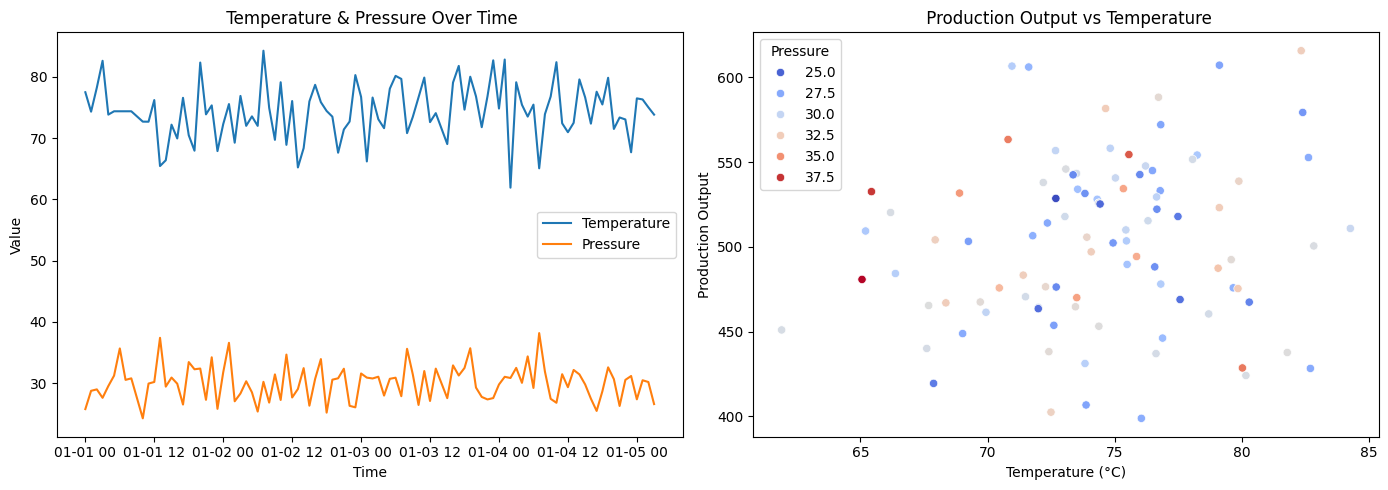

In [8]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x="Time", y="Temperature", label="Temperature")
sns.lineplot(data=df, x="Time", y="Pressure", label="Pressure")
plt.title(" Temperature & Pressure Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.subplot(1, 2, 2)
print("\n")
sns.scatterplot(data=df, x="Temperature", y="Production_Output", hue="Pressure",palette="coolwarm")
plt.title(" Production Output vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Production Output")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
X = df[["Temperature","Pressure"]]
y = df["Production_Output"]
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print("\n Model Coefficients:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


 Model Coefficients:
Intercept: 370.93033740402313
Coefficients: [1.5829186 0.4766472]


In [14]:
print("\nInsights:")
print("- Temperature and pressure show a correlation with production output.")
print("- Higher temperatures generally result in higher output.")
print("- Predictive model R² score:", model.score(X, y))


Insights:
- Temperature and pressure show a correlation with production output.
- Higher temperatures generally result in higher output.
- Predictive model R² score: 0.020460810491828574
